## Exercise 1 (Introduction to Scikit-learn)

In [83]:
import pandas as pd
import numpy as np

In [84]:
from sklearn import neighbors

In [85]:
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

Question 1 Load the rice data set in a pandas DataFrame.

In [86]:
df = pd.read_csv('rice.csv')

In [87]:
print(df)

       AREA   PERIMETER   MAJORAXIS  MINORAXIS  ECCENTRICITY  CONVEX_AREA  \
0     15231  525.578979  229.749878  85.093788      0.928882        15617   
1     14656  494.311005  206.020065  91.730972      0.895405        15072   
2     14634  501.122009  214.106781  87.768288      0.912118        14954   
3     13176  458.342987  193.337387  87.448395      0.891861        13368   
4     14688  507.166992  211.743378  89.312454      0.906691        15262   
...     ...         ...         ...        ...           ...          ...   
3805  11441  415.858002  170.486771  85.756592      0.864280        11628   
3806  11625  421.390015  167.714798  89.462570      0.845850        11904   
3807  12437  442.498993  183.572922  86.801979      0.881144        12645   
3808   9882  392.296997  161.193985  78.210480      0.874406        10097   
3809  11434  404.709991  161.079269  90.868195      0.825692        11591   

        EXTENT     CLASS  
0     0.572896    Cammeo  
1     0.615436    Cam

In [88]:
df.head()

,AREA,PERIMETER,MAJORAXIS,MINORAXIS,ECCENTRICITY,CONVEX_AREA,EXTENT,CLASS
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


In [89]:
df.shape

(3810, 8)

Question 2 Adapt the typical Scikit-learn code to build a k-NN model on the full data set with
k = 5.

In [90]:
df2 = df.drop(labels = 'CLASS', axis = 1)

In [91]:
X = df2
Y = (df.loc[:, 'CLASS'])

In [92]:
#typical k-NN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,Y)
prediction = knn.predict(X)
print(" {} nn score: {} ".format(5,knn.score(X,Y)))

 5 nn score: 0.9181102362204724 


Question 3 Use confusion_matrix to report the confusion matrix of the k-nn algorithm on
the learning set for k = 5. Print the confusion matrix using the standard scikit-learn convention
and with the transposed convention.

In [93]:
from sklearn import metrics

In [94]:
#standard confusion matrix
metrics.confusion_matrix(Y, y_pred)

array([[1348,  282],
       [ 141, 2039]], dtype=int64)

In [95]:
#transposed matrix
np.transpose(metrics.confusion_matrix(Y, y_pred))

array([[1348,  141],
       [ 282, 2039]], dtype=int64)

In [96]:
#Graphical Representation of the Confusion Matrix

#axis for confusion matrix
y_pred = knn.predict(X)
y_true = Y

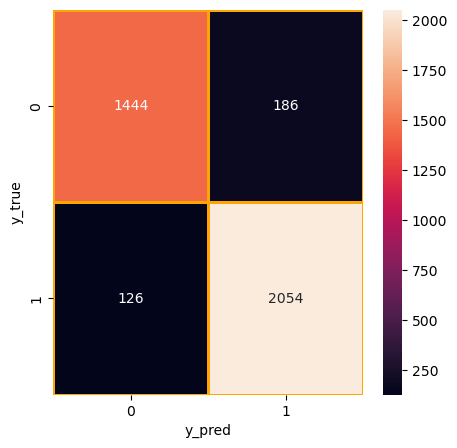

In [97]:
cm= confusion_matrix(y_true, y_pred)

import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 1.0, linecolor="orange", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Question 4 Compute the accuracy of the classifier, its precision and its recall from the confusion
matrix.

In [98]:
#TN = true negetive, FN = false negetive, TP = true positive, FP = false positive
TN = cm[0][0]
FN = cm[1][0]
TP = cm[1][1]
FP = cm[0][1]

In [99]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
precision = TP/(TP+FN)
recall = TP/(TP+FN)

In [100]:
print(accuracy)
print(precision)
print(recall)

0.9181102362204724
0.9422018348623853
0.9422018348623853


Question 5 Compute the same values using the dedicated functions from the metrics module.

In [101]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [102]:
#computing the same using sklearn.metrics
accuracy = accuracy_score(Y, y_pred)

#pos_label can be changed to the other name for that set of values
precision = precision_score(Y, y_pred, pos_label="Cammeo")
recall = recall_score(Y, y_pred, pos_label="Cammeo")

In [103]:
print(accuracy)
print(precision)
print(recall)

0.9181102362204724
0.9197452229299363
0.8858895705521472


Question 6 Using a loop, compute and collect the accuracy of the k-NN model on the learning
set for all odd values of k between 1 and 31.

In [104]:
accuracies = []
#accuracies for all odd values of k
for i in range(1, 31):
    if(i%2!=0):
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(X, Y)
        y_pred = knn.predict(X)
        accuracy = accuracy_score(Y, y_pred)
        accuracies.append(accuracy)

In [105]:
print(accuracies)

[1.0, 0.9356955380577427, 0.9181102362204724, 0.9086614173228347, 0.9020997375328084, 0.8971128608923884, 0.8937007874015748, 0.8931758530183727, 0.8889763779527559, 0.8884514435695539, 0.8892388451443569, 0.8908136482939633, 0.8863517060367454, 0.8871391076115486, 0.8889763779527559]


Question 7 Discuss the results.

Ans: We observe that with the odd values of the k-nearest neighbours, the accuracy of prediction is very high for almost every value. With k=1, it is perfect at 100%. This implies that the fitted model predicts the data well, but we could already foresee this given the fact that we have not split our data into a training and testing set.